In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cleaned_ebay_deals.csv")

In [3]:
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
df = df.sort_values("timestamp")

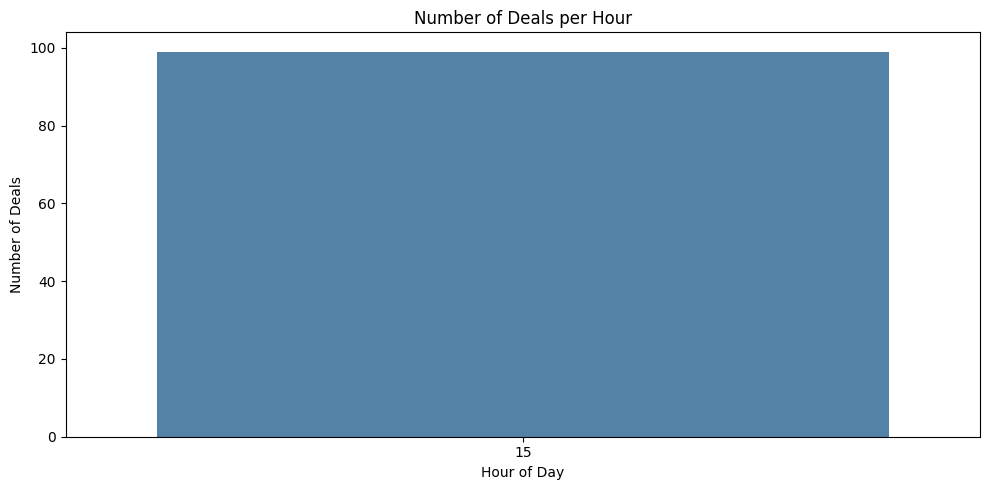

In [4]:
df["hour"] = df["timestamp"].dt.hour
hourly_deals = df.groupby("hour").size()

plt.figure(figsize=(10,5))
sns.barplot(x=hourly_deals.index, y=hourly_deals.values, color="steelblue")
plt.title("Number of Deals per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Deals")
plt.tight_layout()
plt.show()

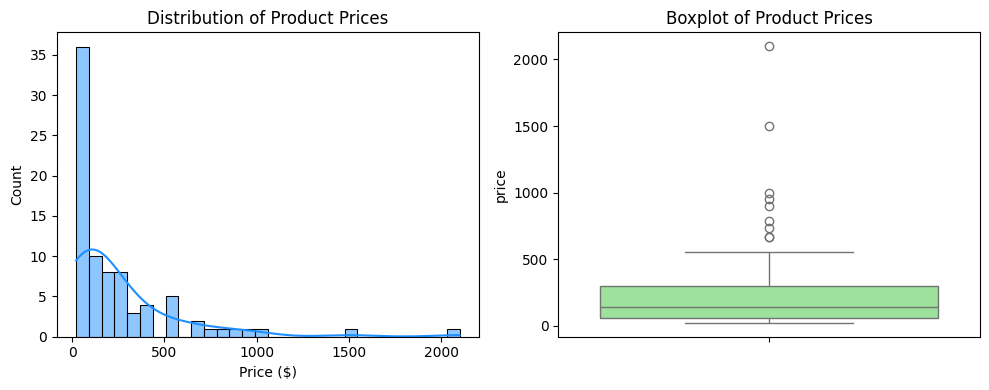

In [5]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df["price"], bins=30, color="dodgerblue", kde=True)
plt.title("Distribution of Product Prices")
plt.xlabel("Price ($)")

plt.subplot(1,2,2)
sns.boxplot(y=df["price"], color="lightgreen")
plt.title("Boxplot of Product Prices")
plt.tight_layout()
plt.show()

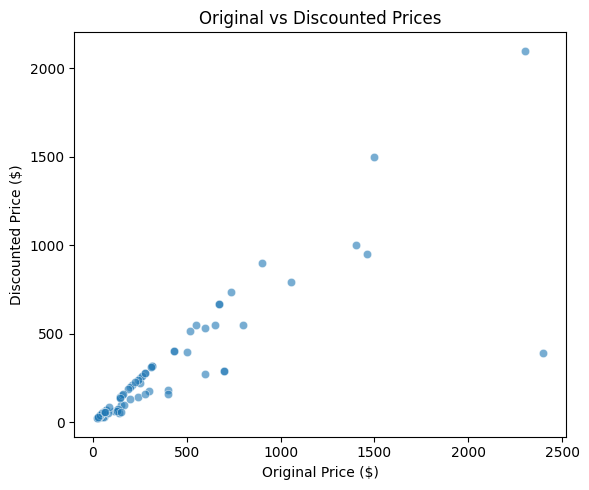

In [6]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="original_price", y="price", data=df, alpha=0.6)
plt.title("Original vs Discounted Prices")
plt.xlabel("Original Price ($)")
plt.ylabel("Discounted Price ($)")
plt.tight_layout()
plt.show()


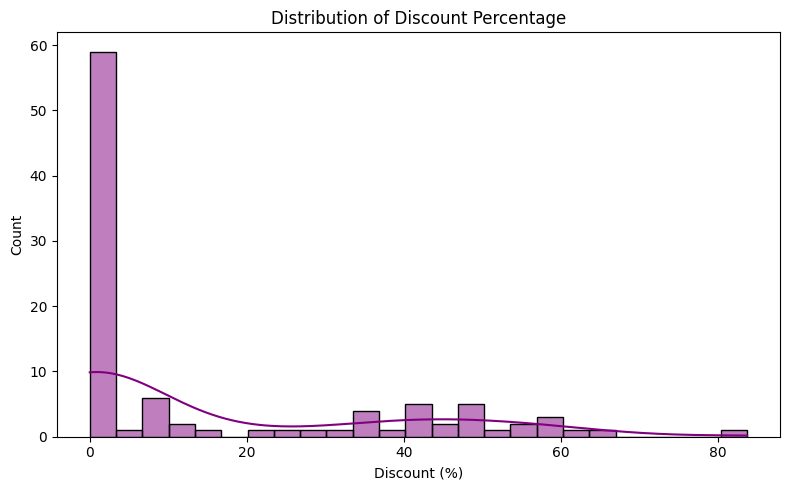

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df["discount_percentage"], bins=25, color="purple", kde=True)
plt.title("Distribution of Discount Percentage")
plt.xlabel("Discount (%)")
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25224\1242714716.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=shipping_counts.index, x=shipping_counts.values, palette="viridis")


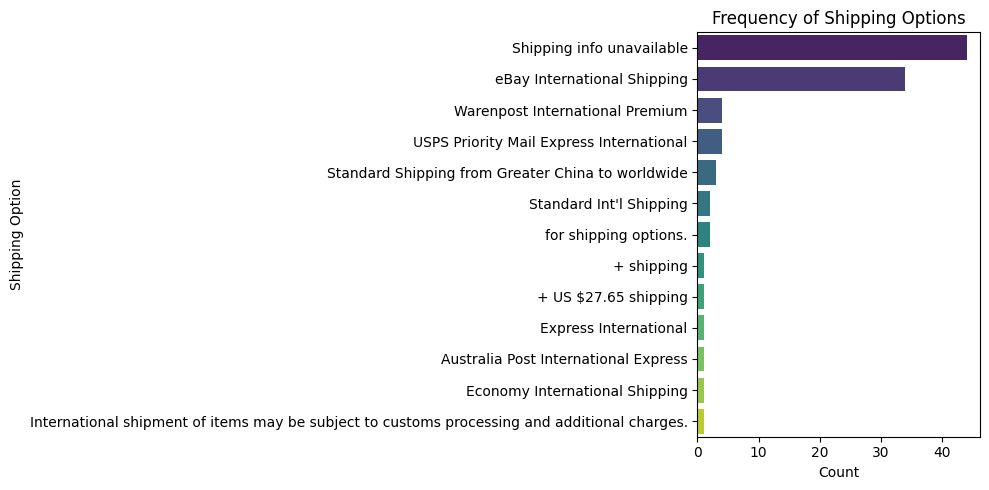

In [8]:
shipping_counts = df["shipping"].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(y=shipping_counts.index, x=shipping_counts.values, palette="viridis")
plt.title("Frequency of Shipping Options")
plt.xlabel("Count")
plt.ylabel("Shipping Option")
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25224\3757291877.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(keyword_freq.keys()), y=list(keyword_freq.values()), palette="Set2")


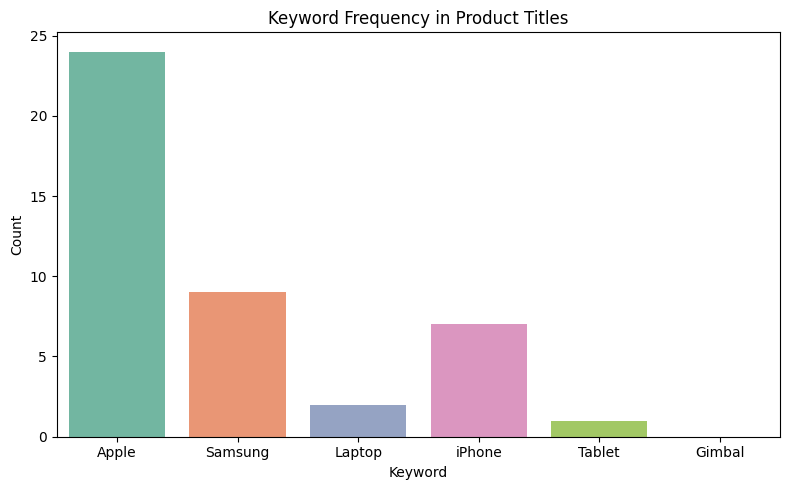

In [9]:
keywords = ["Apple", "Samsung", "Laptop", "iPhone", "Tablet", "Gimbal"]

keyword_freq = {}
for word in keywords:
    keyword_freq[word] = df["title"].str.contains(word, case=False, na=False).sum()

plt.figure(figsize=(8,5))
sns.barplot(x=list(keyword_freq.keys()), y=list(keyword_freq.values()), palette="Set2")
plt.title("Keyword Frequency in Product Titles")
plt.xlabel("Keyword")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


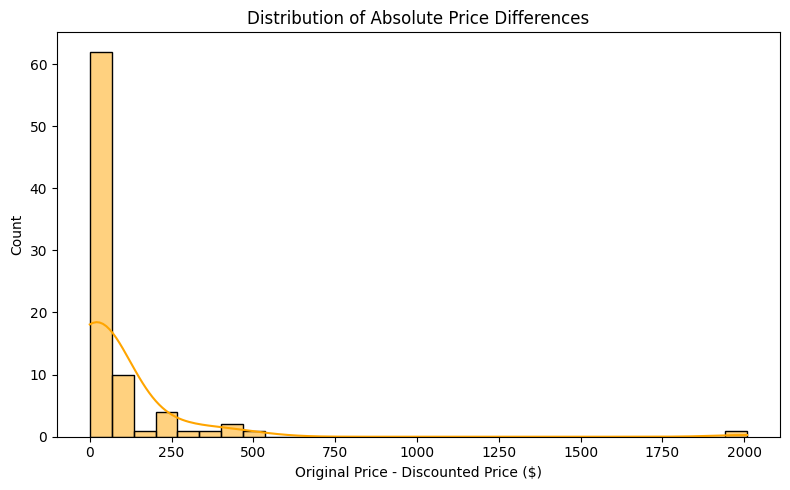

In [10]:
df["absolute_discount"] = df["original_price"] - df["price"]

plt.figure(figsize=(8,5))
sns.histplot(df["absolute_discount"], bins=30, color="orange", kde=True)
plt.title("Distribution of Absolute Price Differences")
plt.xlabel("Original Price - Discounted Price ($)")
plt.tight_layout()
plt.show()

In [11]:
top5 = df.sort_values("discount_percentage", ascending=False).head(5)
print("Top 5 Deals with Highest Discounts:\n")
display(top5[["title", "price", "original_price", "discount_percentage", "shipping", "item_url"]])

Top 5 Deals with Highest Discounts:



,title,price,original_price,discount_percentage,shipping,item_url
25,"2019 Apple MacBook Pro 16"" i7 2.6GHz/16GB/512G...",389.67,2399.00,83.76,Shipping info unavailable,https://www.ebay.com/itm/374766179675?_trkparm...
15,"Proscan 10.1"" Tablet/Portable DVD Combo 2GB/32...",49.99,139.99,64.29,Shipping info unavailable,https://www.ebay.com/itm/364156102432?_trkparm...
42,"Apple iPad 10.2"" 9th Gen, 64GB, Wi-Fi - Gray -...",156.26,399.00,60.84,eBay International Shipping,https://www.ebay.com/itm/185243247562?_trkparm...
5,Sony WH-CH720N Noise Canceling Wireless Headph...,59.99,149.99,60.00,Shipping info unavailable,https://www.ebay.com/itm/314505929469?_trkparm...
40,"Apple iPad Air 10.9"" 4th Gen, 256GB, Wi-Fi - B...",289.85,699.00,58.53,eBay International Shipping,https://www.ebay.com/itm/174772399416?_trkparm...
